In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../../Data/col-worldwide-2020.txt', sep='\t')

df.head()

,Rank,City,Cost of Living,Rent,COL+Rent,Groceries,Restaurant,Purchasing Power
0,1,"Zurich, Switzerland",128.29,61.66,96.42,127.96,124.73,126.90
1,2,"Basel, Switzerland",125.54,45.76,87.38,124.99,123.11,121.47
2,3,"Lausanne, Switzerland",124.02,50.64,88.92,127.26,123.61,110.52
3,4,"Geneva, Switzerland",118.98,68.47,94.82,112.88,119.58,111.16
4,5,"Bern, Switzerland",116.03,40.52,79.91,107.58,115.56,131.89


# Lets see UK

In [26]:
uk_cities = df[df["City"].str.contains("United Kingdom", case=False, na=False)]
uk_cities.head()

# How many uk cities are there?
print(uk_cities.shape)

# What is the average cost of living in uk cities?
print(uk_cities["Cost of Living"].mean())



(24, 8)
68.22250000000001


In [34]:
# which city has best purchase power?
df.sort_values("Purchasing Power", ascending=False).head()

# which city has best purchasing power / cost of living?
df["Value"] = df["Purchasing Power"] / df["Cost of Living"]
df.sort_values("Value", ascending=False).head()






,Rank,City,Cost of Living,Rent,COL+Rent,Groceries,Restaurant,Purchasing Power,Value
416,417,"Navi Mumbai, India",25.39,7.68,16.92,26.46,17.85,100.84,3.971642
439,440,"Thiruvananthapuram, India",19.77,4.33,12.38,20.31,10.66,62.74,3.173495
395,396,"Gurgaon, India",30.28,9.56,20.37,28.26,23.68,91.58,3.024439
429,430,"Nagpur, India",23.48,4.25,14.28,22.81,19.73,63.53,2.705707
428,429,"Mangalore, India",23.49,4.40,14.36,25.05,16.69,58.91,2.507876


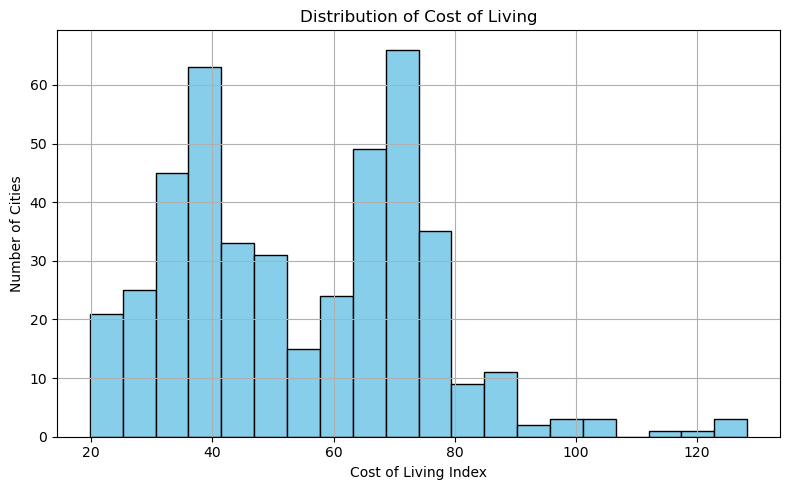

In [38]:
# Histogram of cost of living
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df["Cost of Living"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Cost of Living")
plt.xlabel("Cost of Living Index")
plt.ylabel("Number of Cities")
plt.grid(True)
plt.tight_layout()
plt.show()


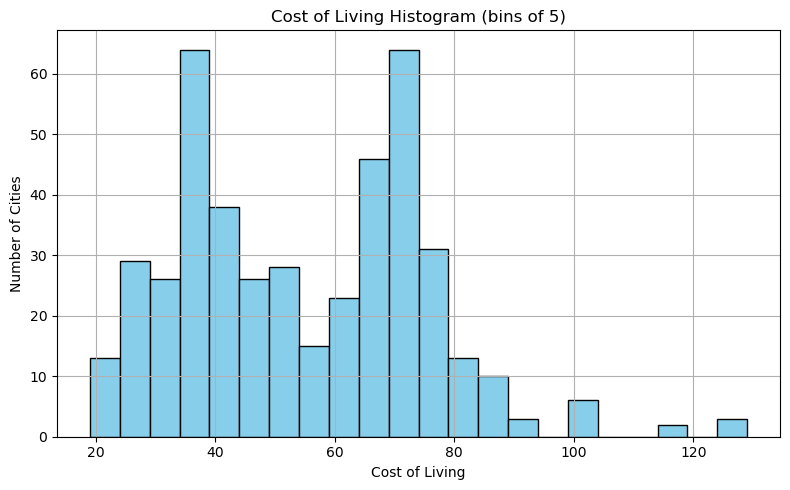

In [43]:
# set bin size explicitly
min_val = df["Cost of Living"].min()
max_val = df["Cost of Living"].max()

bins = list(range(int(min_val), int(max_val) + 5, 5))  # bins of size 5

plt.figure(figsize=(8, 5))
plt.hist(df["Cost of Living"], bins=bins, color="skyblue", edgecolor="black")
plt.title("Cost of Living Histogram (bins of 5)")
plt.xlabel("Cost of Living")
plt.ylabel("Number of Cities")
plt.grid(True)
plt.tight_layout()
plt.show()

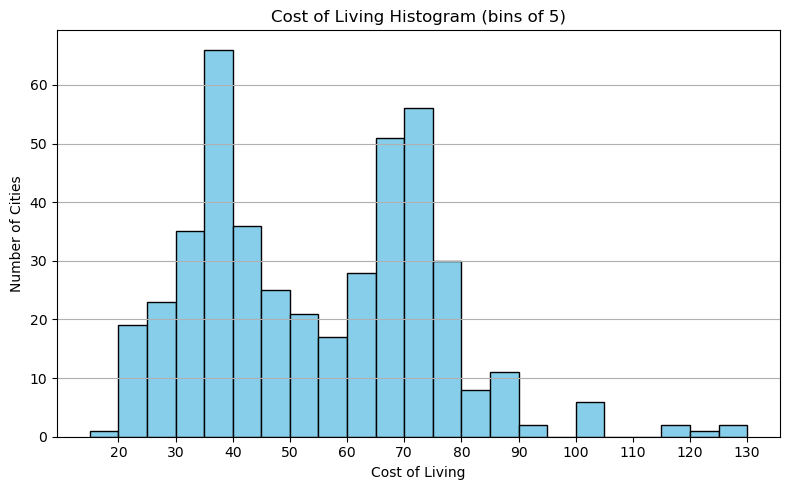

In [48]:
import matplotlib.pyplot as plt
import math

col = "Cost of Living"

# Step 1: Get min and max values, rounded to nearest 5
min_val = math.floor(df[col].min() / 5) * 5
max_val = math.ceil(df[col].max() / 5) * 5

# Step 2: Create bins with width 5
bins = list(range(min_val, max_val + 5, 5))

# Step 3: Plot
plt.figure(figsize=(8, 5))
plt.hist(df[col], bins=bins, color="skyblue", edgecolor="black")
plt.title(f"{col} Histogram (bins of 5)")
plt.xlabel(col)
plt.ylabel("Number of Cities")
plt.xticks([x for x in bins if x % 10 == 0])
plt.grid(axis="y")  # horizontal grid lines only
plt.tight_layout()
plt.show()
